# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/Internships/Neuronetix/Session 1/Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


### Remove the column 'unname: 0' since it's useless

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [4]:
x = df[['YearsExperience']]
y = df['Salary']

### Splitting the dataset

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [7]:
# Prediction using the linear regression model
y_pred = lr.predict(x_test)

### Calculate MSE, MAE, and R2 for test

In [8]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set Mean Square Error: {mse}, Mean Absolute Error: {mae}, R2: {r2}")

Test Set Mean Square Error: 49830096.855908334, Mean Absolute Error: 6286.453830757745, R2: 0.9024461774180498


### Split the data in train, validation, and test


In [9]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
lr.fit(x_train, y_train)

# Predict on Validation and Test sets
y_val_pred = lr.predict(x_val)
y_test_pred = lr.predict(x_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set Mean Square Error: {val_mse}, Mean Absolute Error: {val_mae}, R2: {val_r2}")
print(f"Test Set Mean Square Error: {test_mse}, Mean Absolute Error: {test_mae}, R2: {test_r2}")

Validation Set Mean Square Error: 12192116.601371067, Mean Absolute Error: 2513.295176064142, R2: 0.9845840557494077
Test Set Mean Square Error: 49080989.5927547, Mean Absolute Error: 6249.07484073405, R2: 0.9039127263845481


### Cross Validation

In [10]:
cv_mse = cross_val_score(lr, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(lr, x, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(lr, x, y, cv=5, scoring='r2')

print(f"Cross-Validation Mean Square Error: {-np.mean(cv_mse)}, Mean Absolute Error: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")

Cross-Validation Mean Square Error: 44168849.46887106, Mean Absolute Error: 5723.127060934899, R²: -0.05336427684509852


### Confusion Matrix

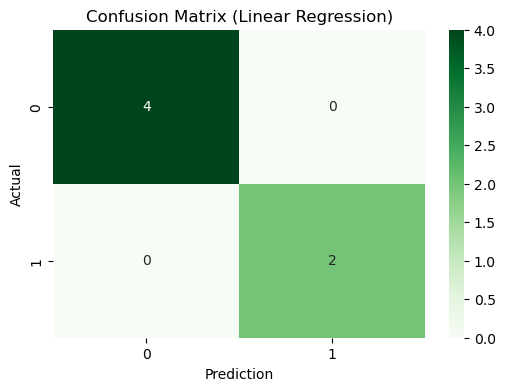

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Apply threshold for binary classification (for illustration purposes)
y_pred_binary = (y_pred > y_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Confusion Matrix (Linear Regression)')

plt.show()

### Roc & Auc

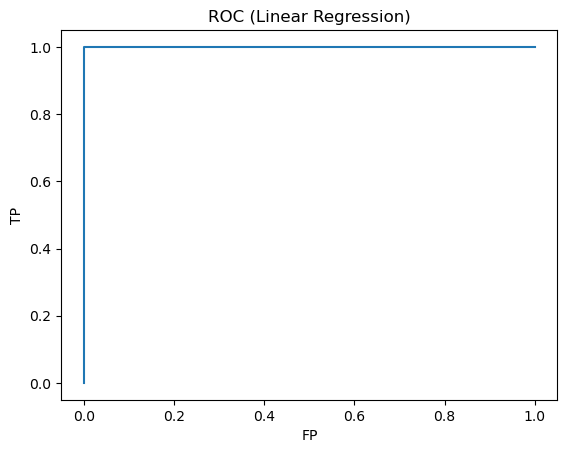

In [12]:
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC (Linear Regression)')
plt.show()

### Predictions

In [13]:
years_experience_df = pd.DataFrame([[5]], columns=['YearsExperience'])

predicted_salary = lr.predict(years_experience_df)
predicted_salary_value = float(predicted_salary[0])

print(f"The predicted salary for {years_experience_df['YearsExperience'][0]} years of experience is: ${predicted_salary_value:.2f}")

The predicted salary for 5 years of experience is: $71756.08


In [14]:
years_experience_df = pd.DataFrame([[11]], columns=['YearsExperience'])

predicted_salary = lr.predict(years_experience_df)
predicted_salary_value = float(predicted_salary[0])

print(f"The predicted salary for {years_experience_df['YearsExperience'][0]} years of experience is: ${predicted_salary_value:.2f}")

The predicted salary for 11 years of experience is: $127401.88


In [15]:
years_experience_df = pd.DataFrame([[3]], columns=['YearsExperience'])

predicted_salary = lr.predict(years_experience_df)
predicted_salary_value = float(predicted_salary[0])

print(f"The predicted salary for {years_experience_df['YearsExperience'][0]} years of experience is: ${predicted_salary_value:.2f}")

The predicted salary for 3 years of experience is: $53207.48


### Accuracy

In [16]:
print('Train accuracy ',lr.score(x_train, y_train ))
print('Test accuracy ',lr.score(x_test, y_test ))

Train accuracy  0.955665407971798
Test accuracy  0.9039127263845481


### Train set visualization

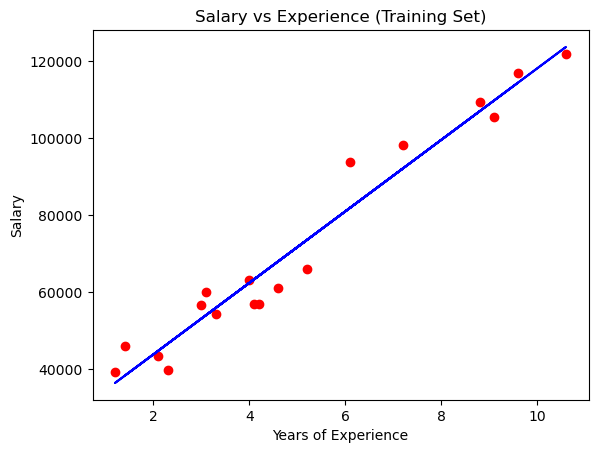

In [17]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Test set visualization

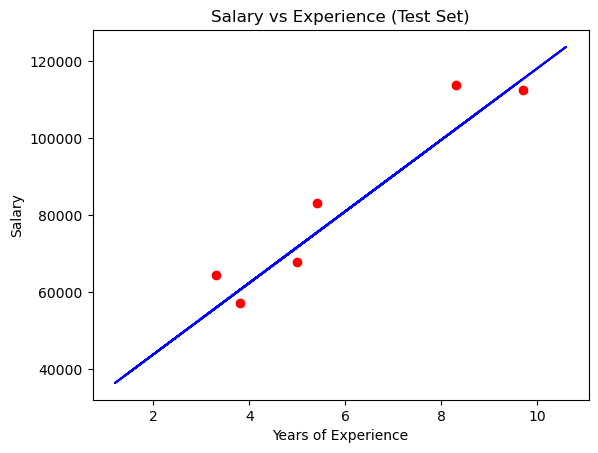

In [18]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Polynomial Regression

In [19]:
df1 = pd.read_csv("C:/Users/DELL/Desktop/Internships/Neuronetix/Session 1/rank_salary.csv")
df1

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [20]:
x = df1[["Level"]]
y = df1["Salary"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
model = LinearRegression()

### 2 Degree Polynomial

In [23]:
poly2 = PolynomialFeatures(degree = 2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

In [24]:
model.fit(x_train_poly2, y_train)
y_pred2 = model.predict(x_test_poly2)

In [25]:
print("PolynomialRegression Train accuracy: ", model.score(x_train_poly2, y_train))
print("PolynomialRegression Test accuracy: ", model.score(x_test_poly2, y_test))

PolynomialRegression Train accuracy:  0.9280776280497959
PolynomialRegression Test accuracy:  0.7666492889299867


### 3 Degree Polynomial

In [26]:
poly3 = PolynomialFeatures(degree = 3)
x_train_poly3 = poly3.fit_transform(x_train)
x_test_poly3 = poly3.transform(x_test)

In [27]:
model.fit(x_train_poly3, y_train)
y_pred3 = model.predict(x_test_poly3)

In [28]:
print("PolynomialRegression Train accuracy: ", model.score(x_train_poly3, y_train))
print("PolynomialRegression Test accuracy: ", model.score(x_test_poly3, y_test))

PolynomialRegression Train accuracy:  0.9913280453724184
PolynomialRegression Test accuracy:  0.8762695647830209


### 4 Degree Polynomial

In [29]:
poly4 = PolynomialFeatures(degree = 4)
x_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)

In [30]:
model.fit(x_train_poly4, y_train)
y_pred4 = model.predict(x_test_poly4)

In [31]:
print("PolynomialRegression Train accuracy: ", model.score(x_train_poly4, y_train))
print("PolynomialRegression Test accuracy: ", model.score(x_test_poly4, y_test))

PolynomialRegression Train accuracy:  0.9995857211026754
PolynomialRegression Test accuracy:  0.9714666803841844


### Calculate MSE, MAE, and R2 for test

In [32]:
mse = mean_squared_error(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print(f"Test Set Mean Square Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")

Test Set Mean Square Error: 1444499305.5506663, Mean Absolute Error: 35700.35460992341, R²: 0.9714666803841844


### Split the data in train, validation, and test

In [33]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)  
x_val_poly = poly.transform(x_val)          
x_test_poly = poly.transform(x_test)        

# Initialize and train the model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predict on Validation and Test sets
y_val_pred = model.predict(x_val_poly)
y_test_pred = model.predict(x_test_poly)

# Calculate MSE, MAE, and R² for the Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for the Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results for both validation and test sets
print(f"Validation Set Mean Square Error: {val_mse}, Mean Absolute Error: {val_mae}, R²: {val_r2}")
print(f"Test Set Mean Square Error: {test_mse}, Mean Absolute Error: {test_mae}, R²: {test_r2}")

Validation Set Mean Square Error: 31979471807.577534, Mean Absolute Error: 129387.01789421181, R²: -29.276423013091158
Test Set Mean Square Error: 2130799099.4314098, Mean Absolute Error: 44643.21440461138, R²: 0.9579101412457993


### Cross Validation

In [34]:
cv_mse = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, x, y, cv=5, scoring='r2')

print(f"Cross-Validation Mean Square Error: {-np.mean(cv_mse)}, Mean Absolute Error: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")

Cross-Validation Mean Square Error: 86661778604.29477, Mean Absolute Error: 233318.45238095237, R²: -3008.4028091967493


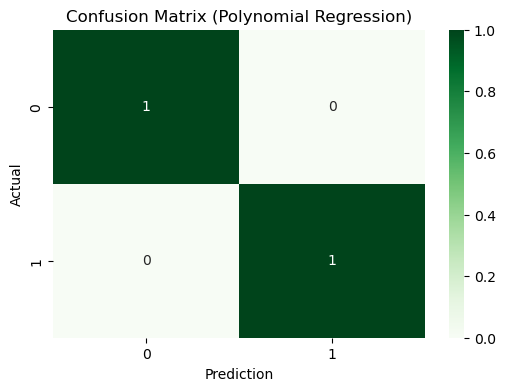

In [35]:
y_pred_binary = (y_pred4 > y_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Confusion Matrix (Polynomial Regression)')
plt.show()

### Roc & Auc

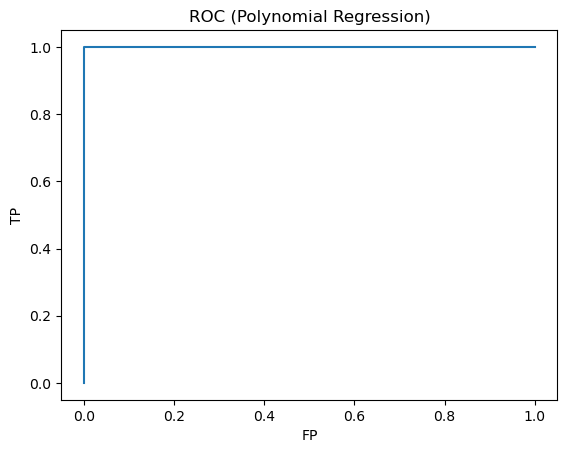

In [36]:
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC (Polynomial Regression)')
plt.show()

### Predictions

In [37]:
x_new = np.array([[6]])
x_new_poly = poly.transform(x_new)  

y_new_pred = model.predict(x_new_poly)
print(f"Prediction for x_new = {x_new[0][0]}: {y_new_pred[0]}")

Prediction for x_new = 6: 151254.58486169716


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [38]:
x_new = np.array([[3]])
x_new_poly = poly.transform(x_new)  

y_new_pred = model.predict(x_new_poly)
print(f"Prediction for x_new = {x_new[0][0]}: {y_new_pred[0]}")

Prediction for x_new = 3: 60143.38112725946


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [39]:
x_new = np.array([[8]])
x_new_poly = poly.transform(x_new)  

y_new_pred = model.predict(x_new_poly)
print(f"Prediction for x_new = {x_new[0][0]}: {y_new_pred[0]}")

Prediction for x_new = 8: 300752.7509169781


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### Multiple Regression

In [40]:
df2 = pd.read_csv("C:/Users/DELL/Desktop/Internships/Neuronetix/Session 1/multiple_linear_regression_dataset.csv")
df2

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [41]:
x = df2[["age","experience"]]
y = df2["income"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [43]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = regressor.predict(x_test)

### Calculate MSE, MAE, and R2 for test

In [45]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set Mean Square Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")

Test Set Mean Square Error: 753796.7693734544, Mean Absolute Error: 797.9113810821873, R²: 0.9387098237077887


### Split the data in train, validation, and test

In [46]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
model.fit(x_train, y_train)

# Predict on Validation and Test sets
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set Mean Square Error: {val_mse}, Mean Absolute Error: {val_mae}, R²: {val_r2}")
print(f"Test Set Mean Square Error: {test_mse}, Mean Absolute Error: {test_mae}, R²: {test_r2}")

Validation Set Mean Square Error: 2390672.9754583323, Mean Absolute Error: 1428.5836699911633, R²: 0.9726136495647532
Test Set Mean Square Error: 788467.3593407959, Mean Absolute Error: 863.2393321550317, R²: 0.9358908058271209


### Cross Validation

In [47]:
# Perform 5-Fold Cross Validation
cv_mse = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, x, y, cv=5, scoring='r2')

print(f"Cross-Validation Mean Square Error: {-np.mean(cv_mse)}, Mean Absolute Error: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")

Cross-Validation Mean Square Error: 1944174.0363691815, Mean Absolute Error: 1122.6188216256787, R²: 0.9331289972266468


### Confusion Matrix

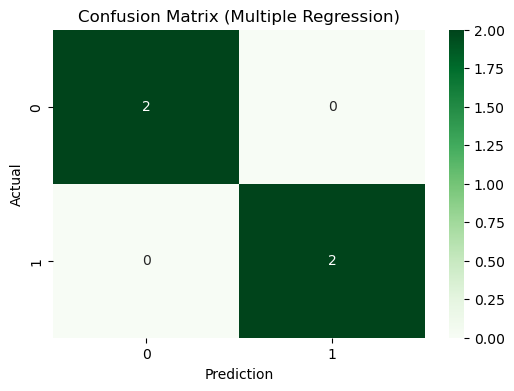

In [48]:
y_pred_binary = (y_pred > y_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Confusion Matrix (Multiple Regression)')
plt.show()

### Roc & Auc

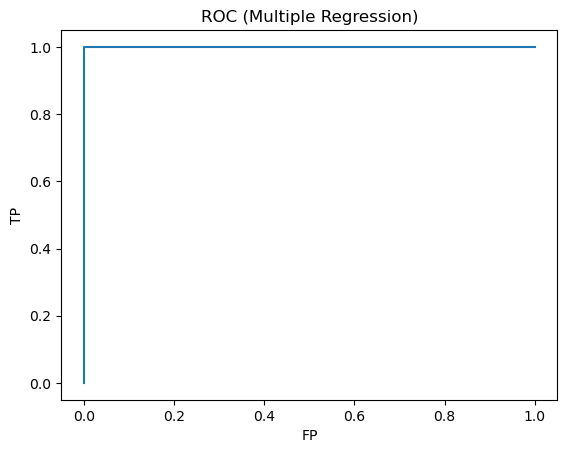

In [49]:
fpr, tpr,_ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC (Multiple Regression)')
plt.show()

### Predictions

In [50]:
x_new = pd.DataFrame([[47, 2]], columns=["age", "experience"])
p = regressor.predict(x_new)
print(f"Prediction for x_new = [[47, 2]]: {p[0]}")

Prediction for x_new = [[47, 2]]: 31024.883429511516


In [51]:
x_new = pd.DataFrame([[20, 4]], columns=["age", "experience"])
p = regressor.predict(x_new)
print(f"Prediction for x_new = [[20, 4]]: {p[0]}")

Prediction for x_new = [[20, 4]]: 38063.09371958478


In [52]:
x_new = pd.DataFrame([[25, 7]], columns=["age", "experience"])
p = regressor.predict(x_new)
print(f"Prediction for x_new = [[25, 7]]: {p[0]}")

Prediction for x_new = [[25, 7]]: 44022.214030404284


### Accuracy

In [53]:
print("Train accuracy: ", regressor.score(x_train, y_train))
print("Test accuracy: ", regressor.score(x_test, y_test))

Train accuracy:  0.9577404090755253
Test accuracy:  0.9387098237077887


### Student dropout

In [54]:
df = pd.read_csv("C:/Users/DELL/Desktop/Internships/Neuronetix/Session 2/student_dropout.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [55]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [56]:
df.shape

(4424, 37)

In [57]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [58]:
columns_to_drop = ['Application order', 'Course', 'Daytime/evening attendance\t', 'Nacionality', "Mother's occupation", "Father's occupation", "Mother's qualification", "Father's qualification", "Unemployment rate", "Inflation rate", "GDP"]

# Drop the columns
df = df.drop(columns=columns_to_drop)
df

,Marital status,Application mode,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,17,1,122.0,127.3,1,0,0,1,1,...,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,1,15,1,160.0,142.5,1,0,0,0,1,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,1,1,1,122.0,124.8,1,0,0,0,1,...,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,1,17,1,122.0,119.6,1,0,0,1,0,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,2,39,1,100.0,141.5,0,0,0,1,0,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,1,125.0,122.2,0,0,0,1,1,...,5,13.600000,0,0,6,8,5,12.666667,0,Graduate
4420,1,1,1,120.0,119.0,1,0,1,0,0,...,6,12.000000,0,0,6,6,2,11.000000,0,Dropout
4421,1,1,1,154.0,149.5,1,0,0,1,0,...,7,14.912500,0,0,8,9,1,13.500000,0,Dropout
4422,1,1,1,180.0,153.8,1,0,0,1,0,...,5,13.800000,0,0,5,6,5,12.000000,0,Graduate



### Check for any null values

In [59]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Previous qualification                            0
Previous qualification (grade)                    0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular u

### Check for any duplicates

In [60]:
duplicates = df[df.duplicated()]
duplicates

,Marital status,Application mode,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
2304,1,17,1,133.1,95.0,0,0,0,1,1,...,0,0.0,0,0,5,5,0,0.0,0,Dropout


### Removing any duplicates

In [61]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Handling Data Types

In [62]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollment                                   int64
International                                       int64
Curricular units 1st sem (credited)                 int64
Curricular units 1st sem (enrolled)                 int64
Curricular units 1st sem (evaluations)              int64
Curricular units 1st sem (approved)                 int64
Curricular uni

### Checking the balance of the target to avoid any bias

In [63]:
count_values = df['Target'].value_counts()
count_values

Target
Graduate    2209
Dropout     1420
Enrolled     794
Name: count, dtype: int64

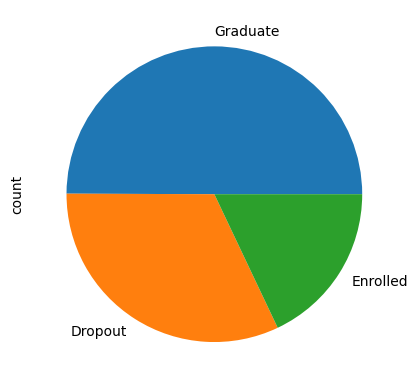

In [64]:
count_values.plot(kind='pie');

<Axes: xlabel='Target', ylabel='count'>

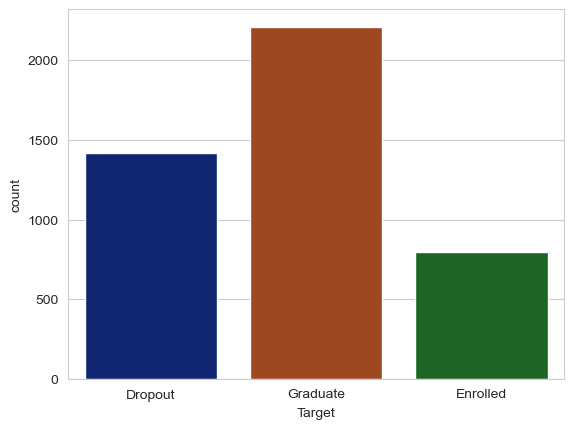

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=df,palette='dark')

### Encode the categorical features

In [66]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features in the same DataFrame
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains categorical data
        df[column] = label_encoder.fit_transform(df[column])

C:\Users\DELL\AppData\Local\Temp\ipykernel_16248\3927752015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])


In [67]:
df.head()

,Marital status,Application mode,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,17,1,122.0,127.3,1,0,0,1,1,...,0,0.000000,0,0,0,0,0,0.000000,0,0
1,1,15,1,160.0,142.5,1,0,0,0,1,...,6,14.000000,0,0,6,6,6,13.666667,0,2
2,1,1,1,122.0,124.8,1,0,0,0,1,...,0,0.000000,0,0,6,0,0,0.000000,0,0
3,1,17,1,122.0,119.6,1,0,0,1,0,...,6,13.428571,0,0,6,10,5,12.400000,0,2
4,2,39,1,100.0,141.5,0,0,0,1,0,...,5,12.333333,0,0,6,6,6,13.000000,0,2


### Scaling the numerical features

In [68]:
# initialize the MinMaxScaler
MS = MinMaxScaler()
# fit the scaler on the features and transform them
scaled_features = MS.fit_transform(df)
scaled_features

# create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=df.columns)
scaled_data.head()

,Marital status,Application mode,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,0.0,0.285714,0.0,0.284211,0.340000,1.0,0.0,0.0,1.0,1.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.0
1,0.0,0.250000,0.0,0.684211,0.500000,1.0,0.0,0.0,0.0,1.0,...,0.230769,0.741722,0.0,0.0,0.26087,0.181818,0.30,0.735897,0.0,1.0
2,0.0,0.000000,0.0,0.284211,0.313684,1.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.0
3,0.0,0.285714,0.0,0.284211,0.258947,1.0,0.0,0.0,1.0,0.0,...,0.230769,0.711447,0.0,0.0,0.26087,0.303030,0.25,0.667692,0.0,1.0
4,0.2,0.678571,0.0,0.052632,0.489474,0.0,0.0,0.0,1.0,0.0,...,0.192308,0.653422,0.0,0.0,0.26087,0.181818,0.30,0.700000,0.0,1.0


### Solving the imbalance by resampling technique

In [69]:
x = df.drop(columns=['Target'])  # Replace 'Target' with the name of your target column
y = df['Target']  # Replace 'Target' with the name of your target column

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

balanced_df = pd.concat([x_resampled, y_resampled], axis=1)

In [70]:
count_values = balanced_df['Target'].value_counts()
count_values

Target
0    2209
2    2209
1    2209
Name: count, dtype: int64

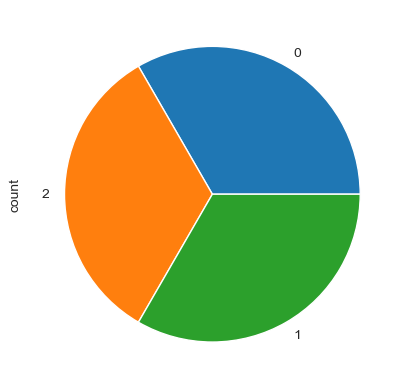

In [71]:
count_values.plot(kind='pie');

### Analyzing the correlation between numerical features and the 'Target' variable

In [72]:
correlation_matrix = balanced_df.corr()

# sort correlations with 'loan_status' in descending order
correlation_with_loan_status = correlation_matrix['Target'].sort_values(ascending=False)

# display correlations with 'loan_status'
print(correlation_with_loan_status)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.620343
Curricular units 2nd sem (grade)                  0.534326
Curricular units 1st sem (approved)               0.533001
Curricular units 1st sem (grade)                  0.451170
Tuition fees up to date                           0.416608
Scholarship holder                                0.329575
Curricular units 2nd sem (enrolled)               0.195880
Curricular units 1st sem (enrolled)               0.176013
Displaced                                         0.161290
Curricular units 2nd sem (evaluations)            0.122765
Admission grade                                   0.112328
Previous qualification (grade)                    0.094550
Curricular units 1st sem (evaluations)            0.075592
Curricular units 2nd sem (credited)               0.072826
Curricular units 1st sem (credited)               0.065145
International                                     0.0314

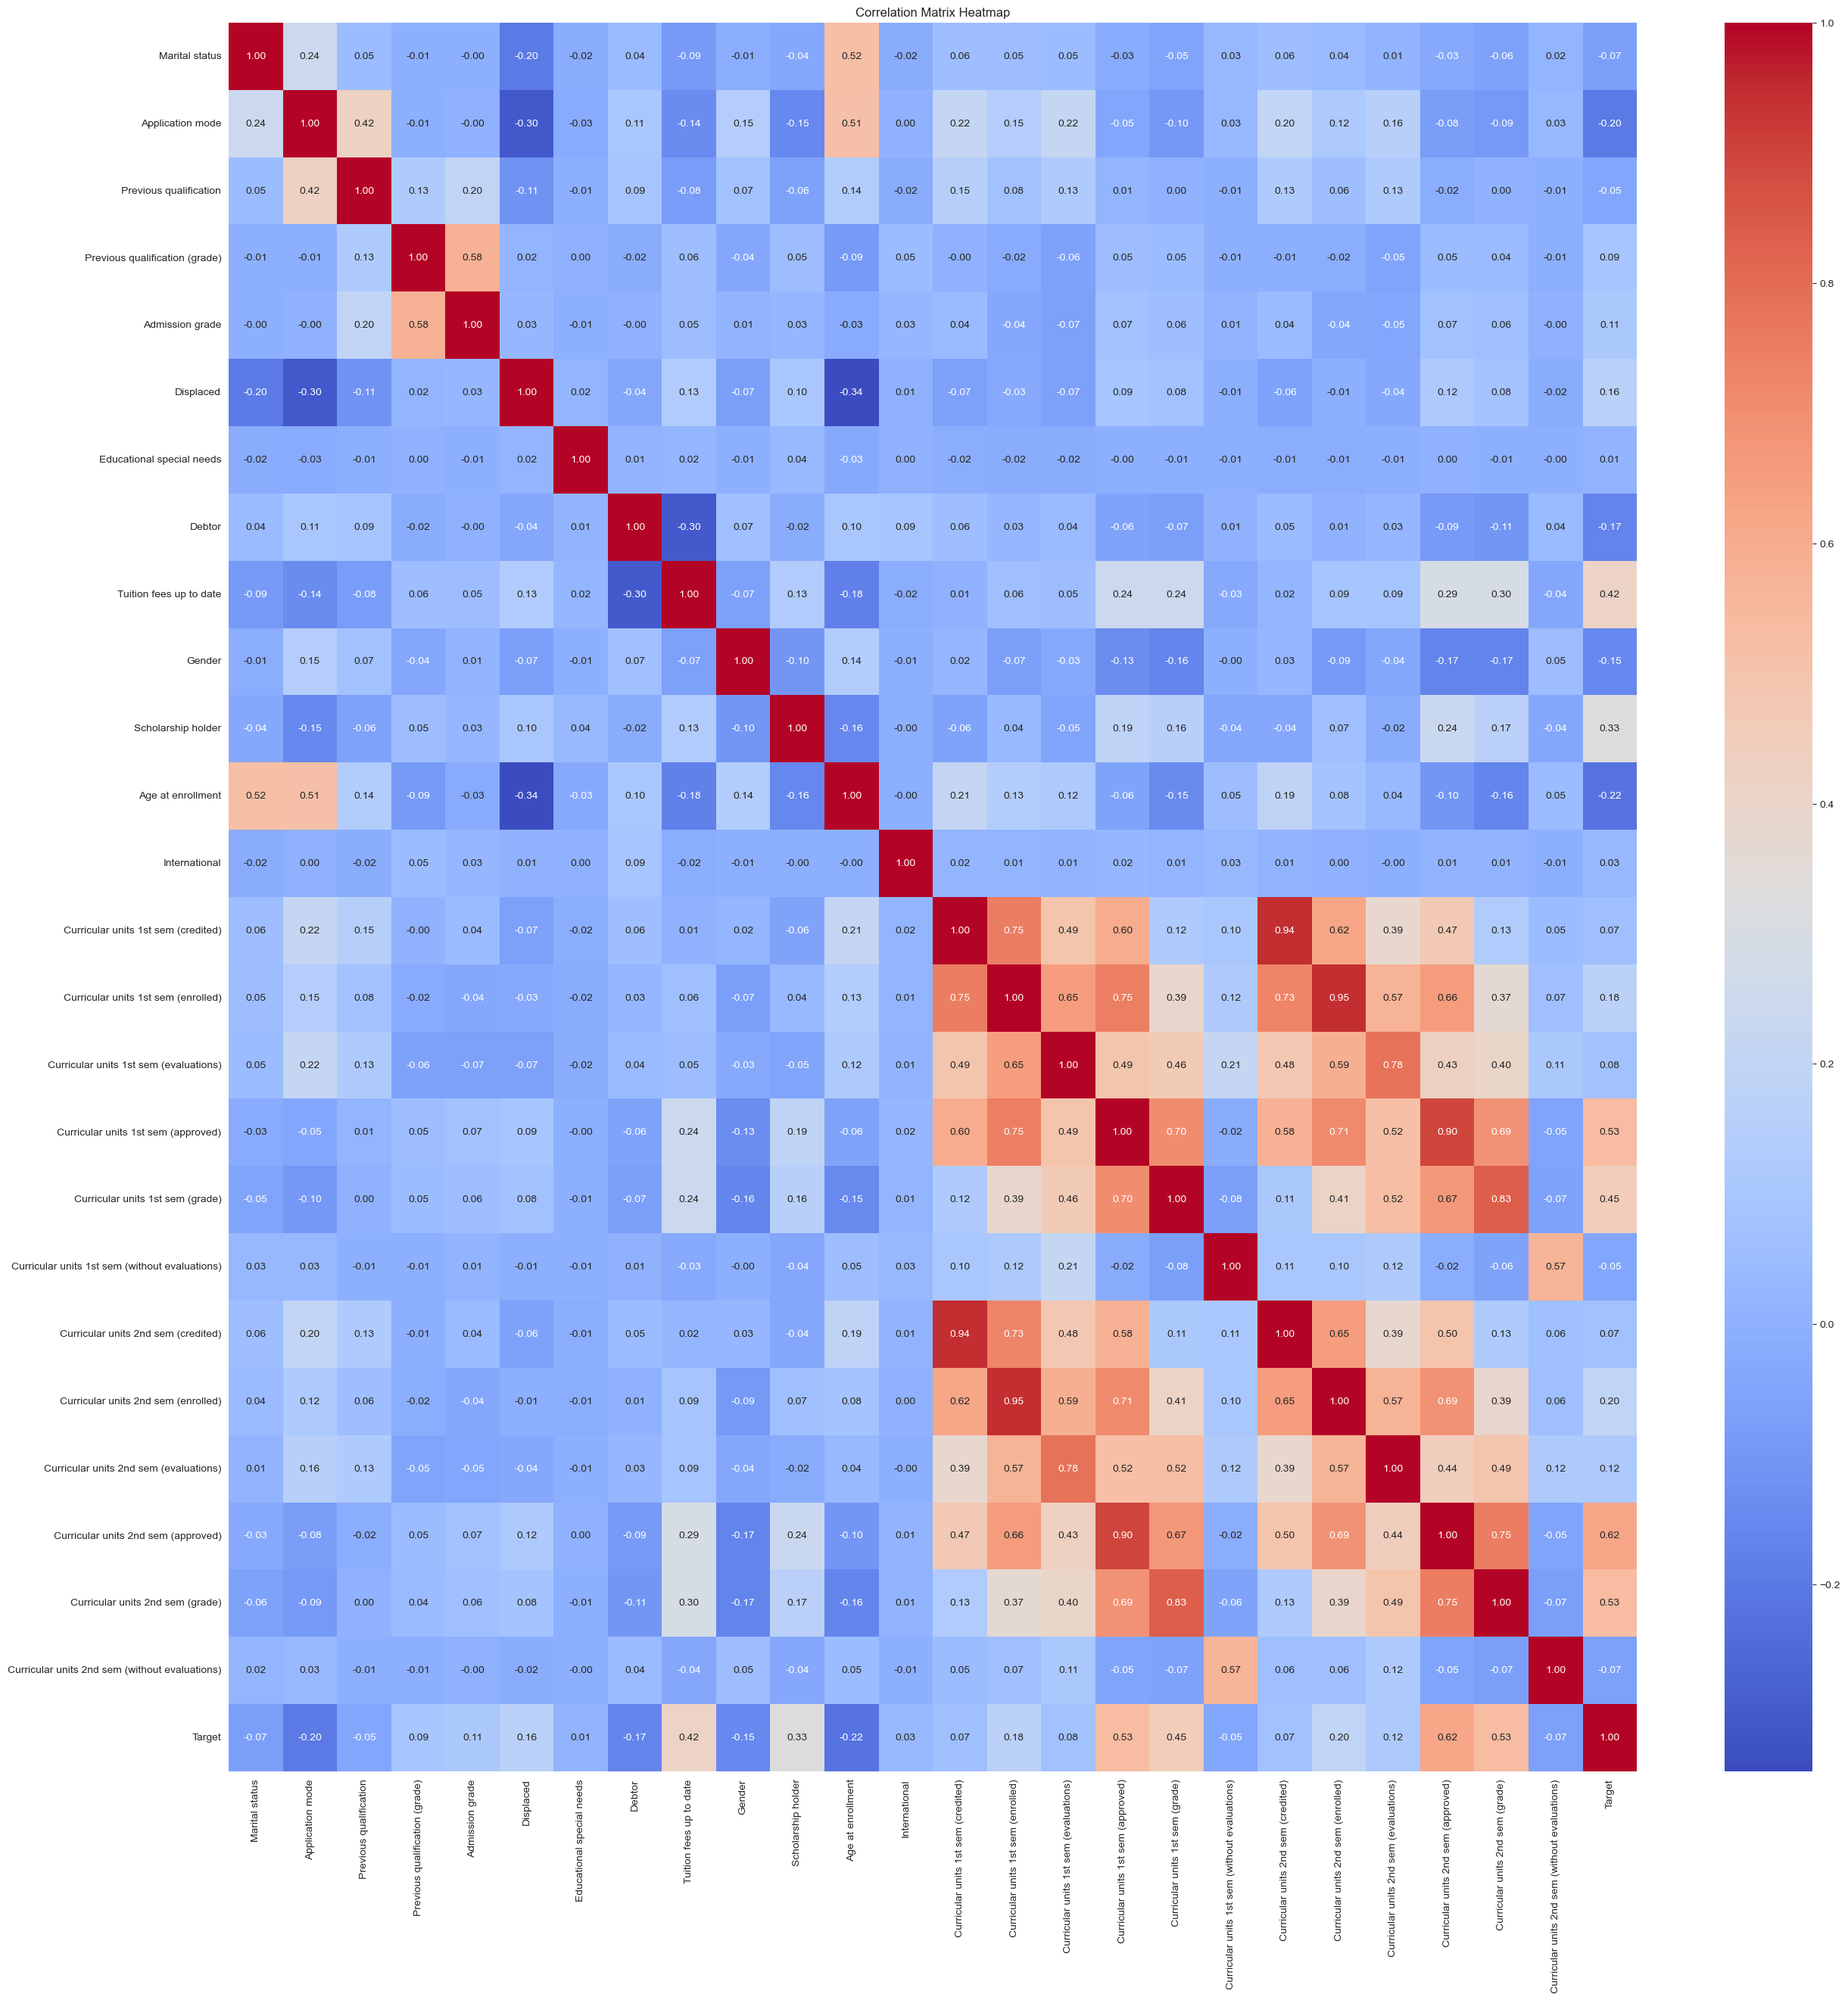

In [73]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Identifying Outliers

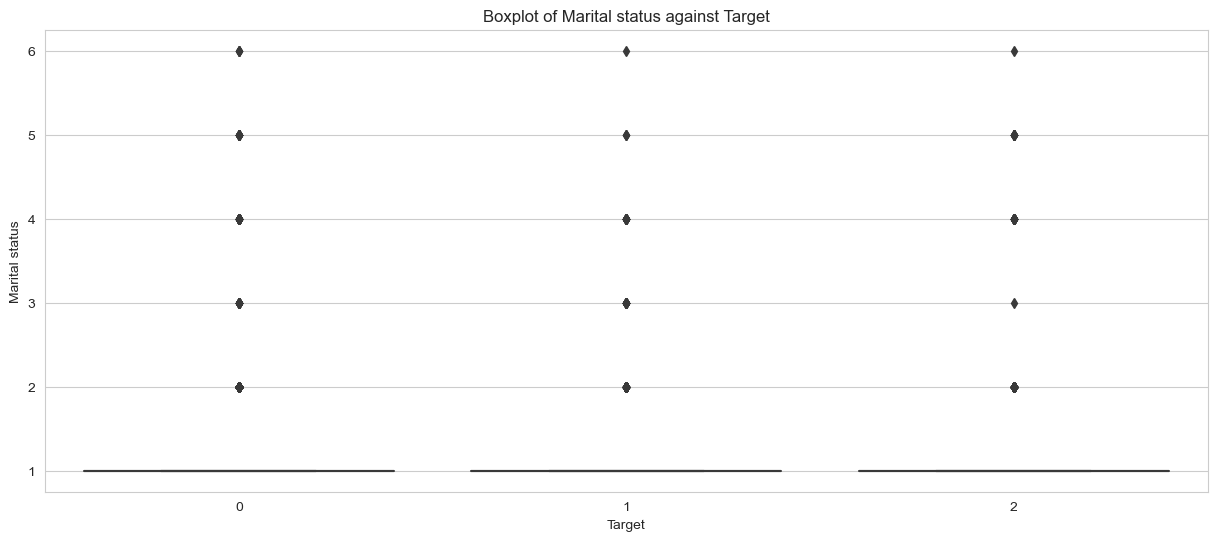

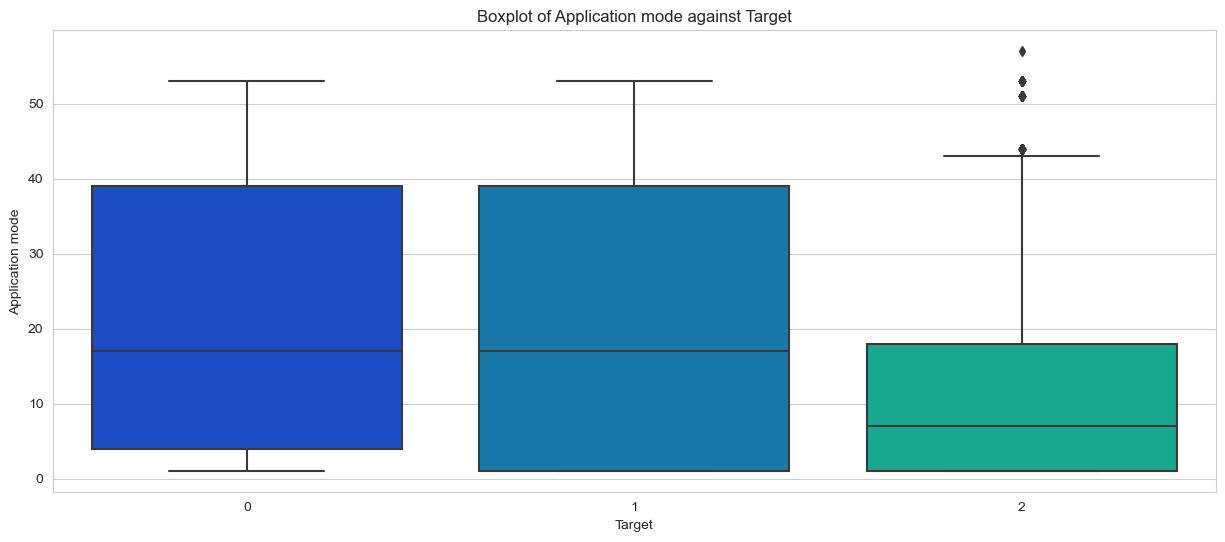

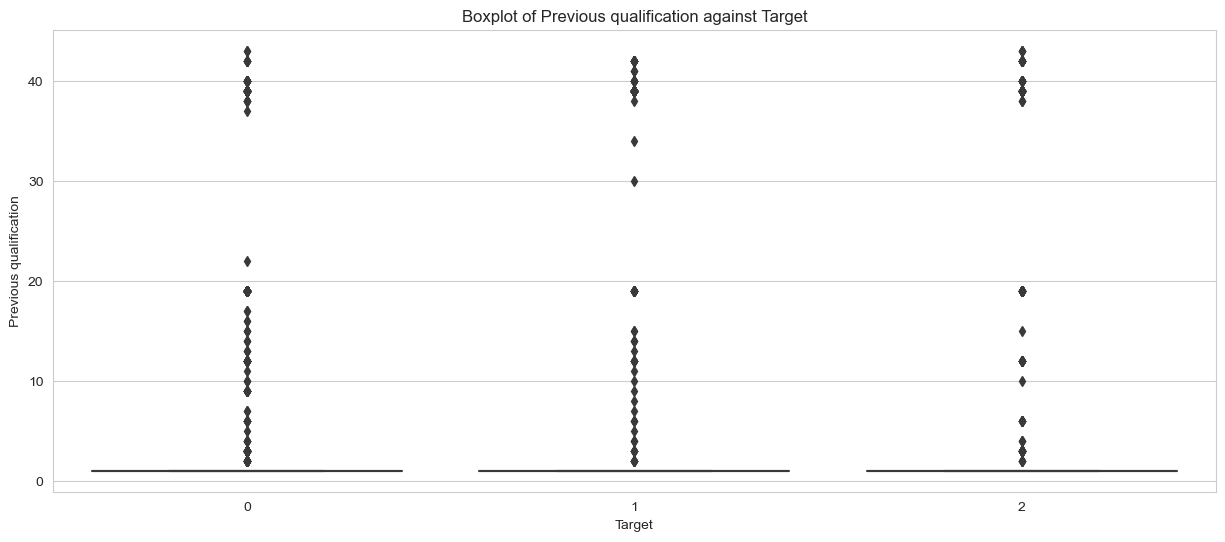

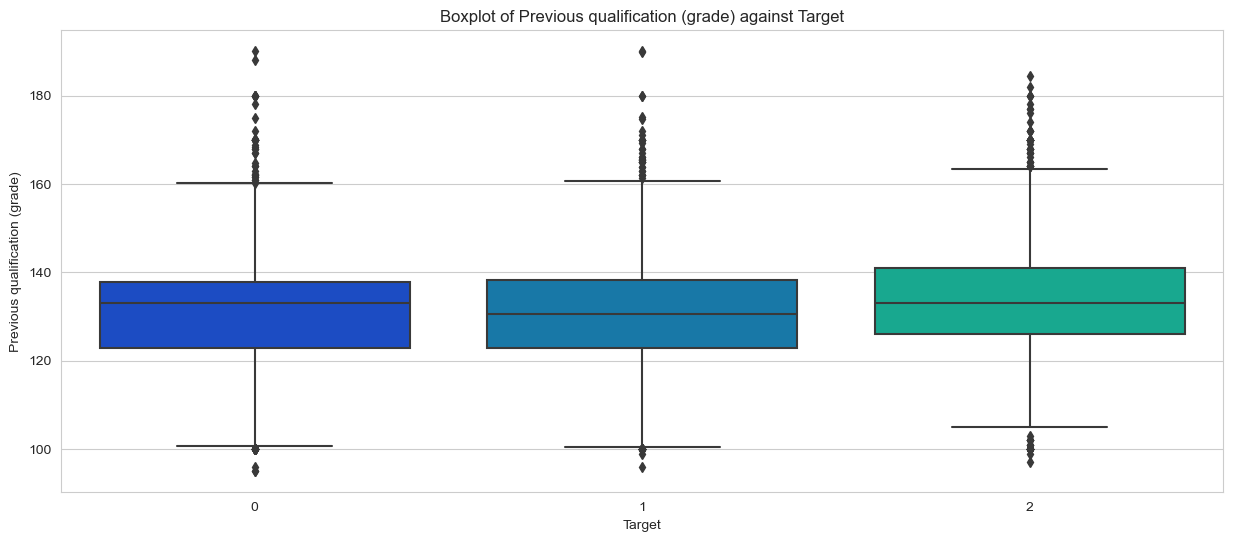

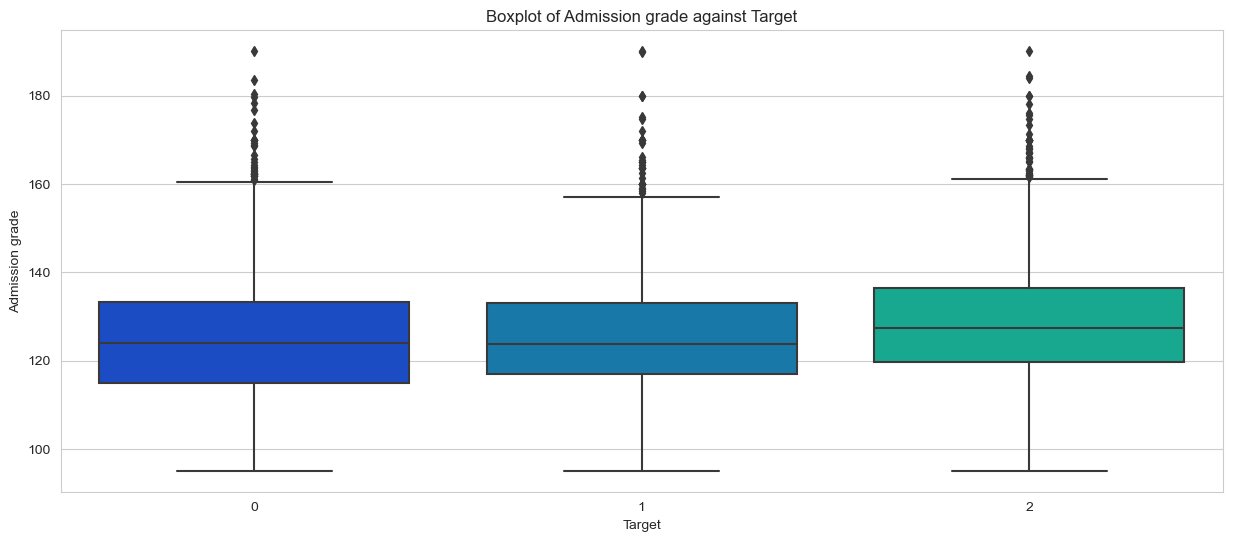

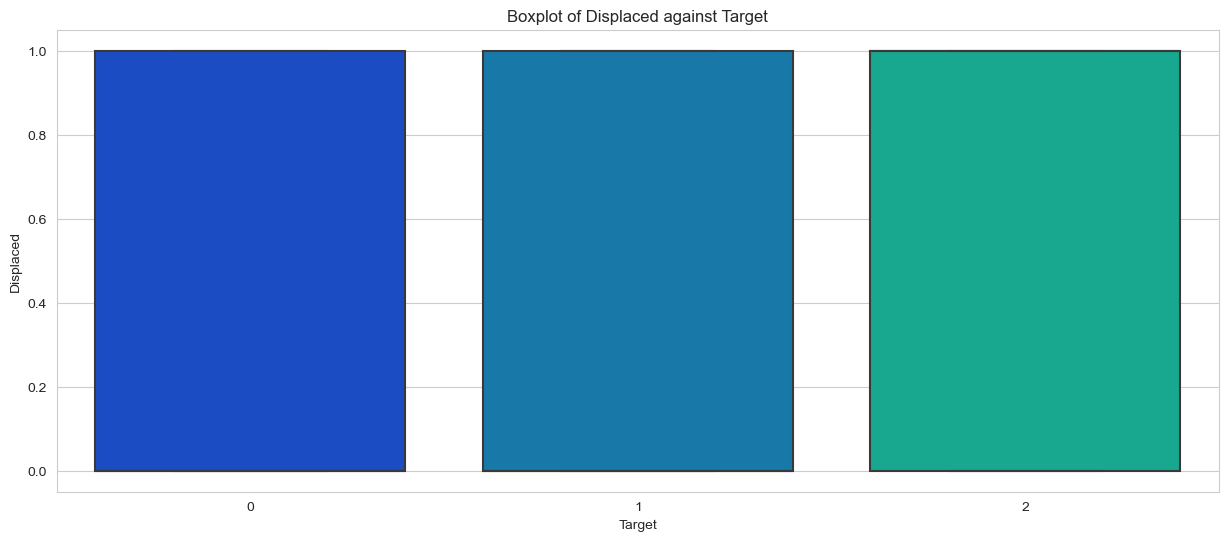

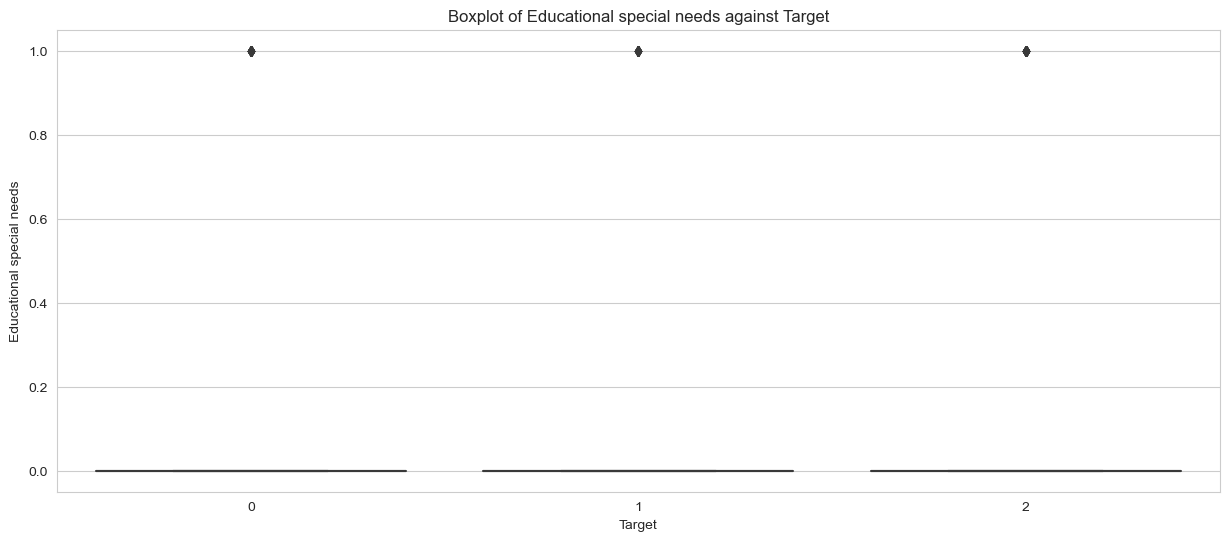

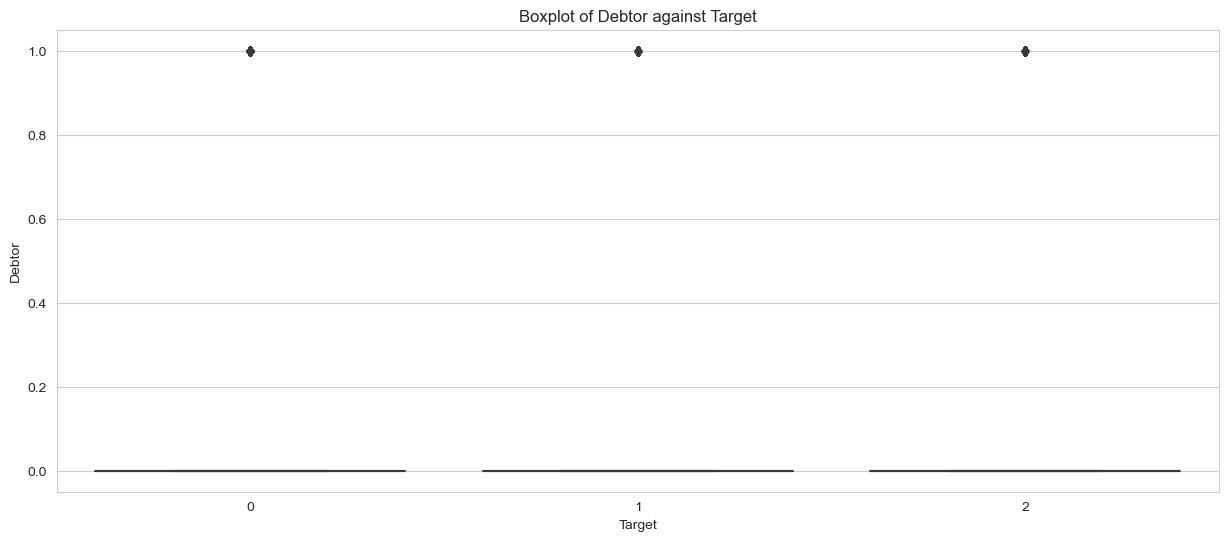

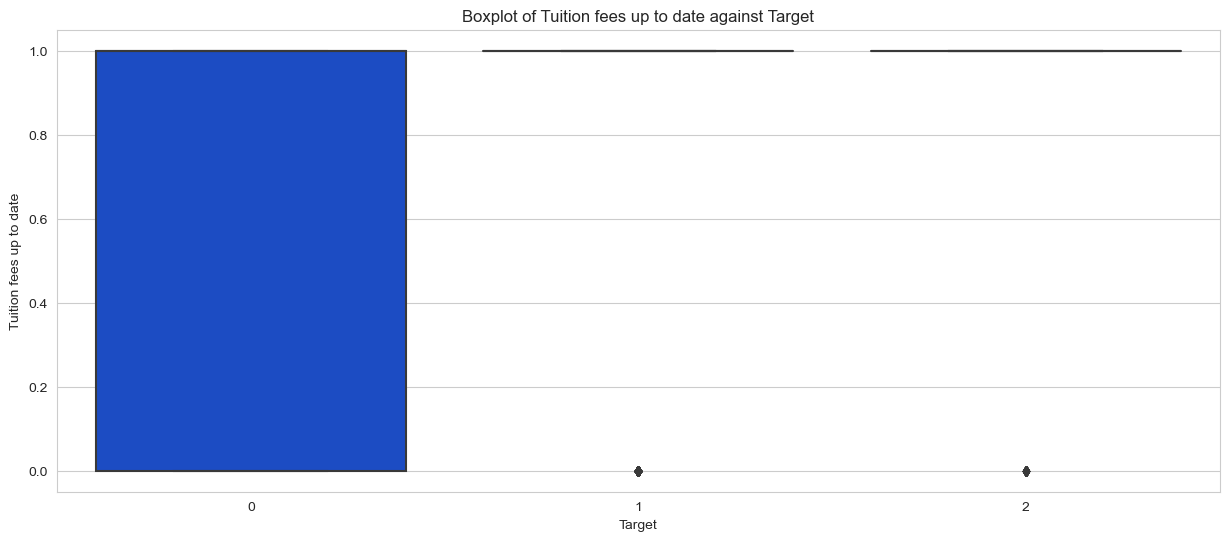

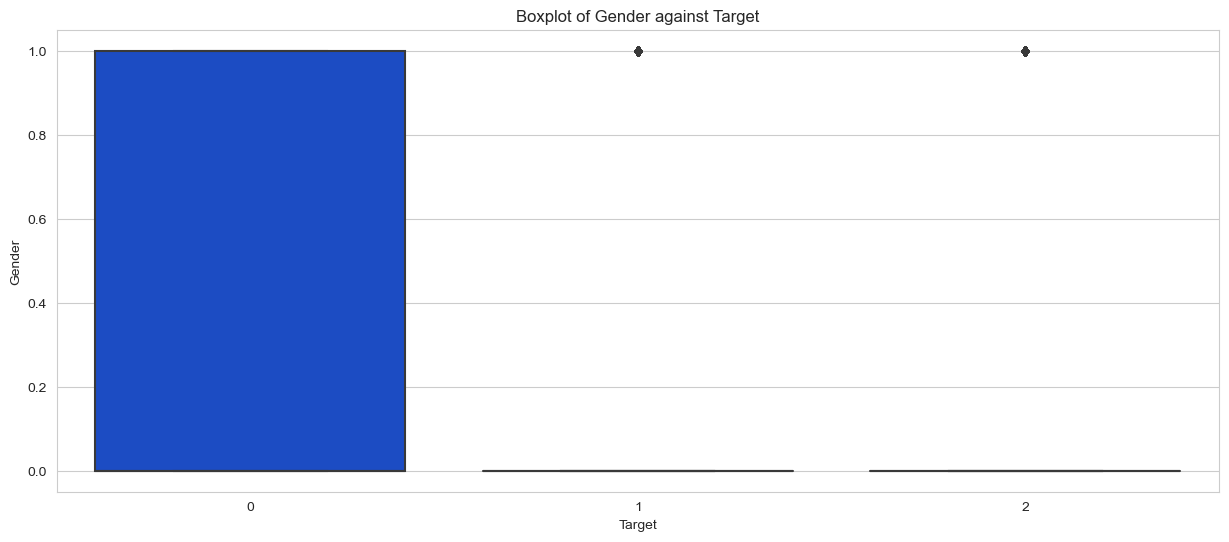

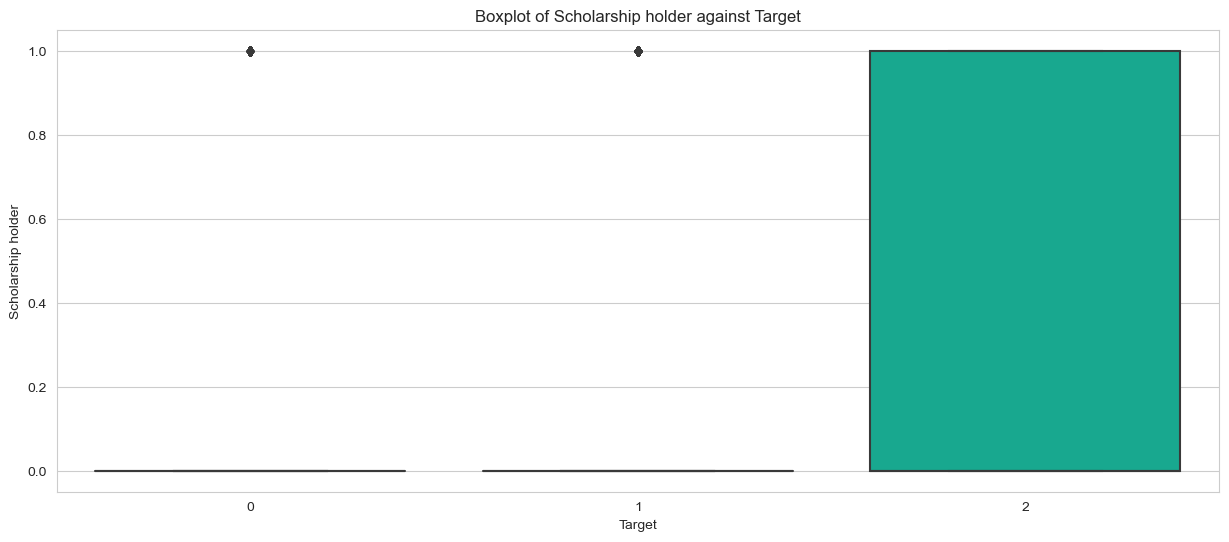

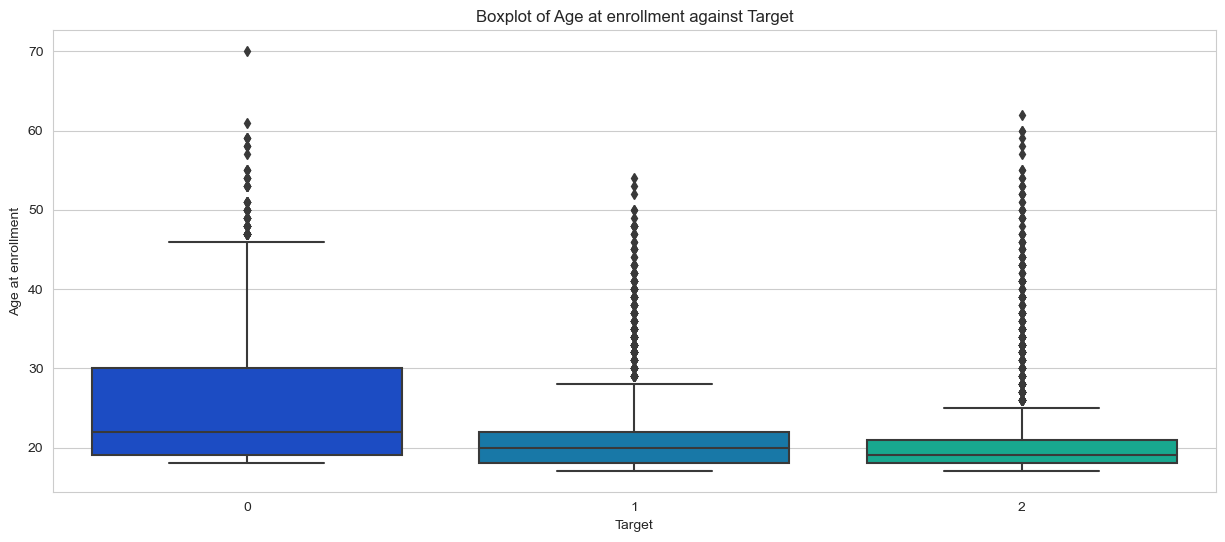

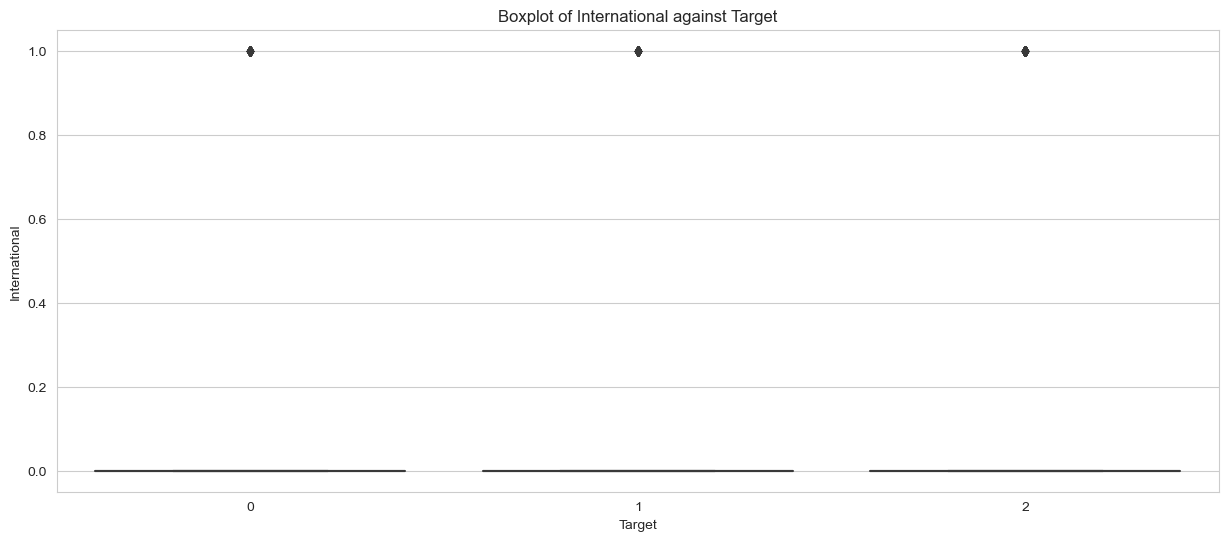

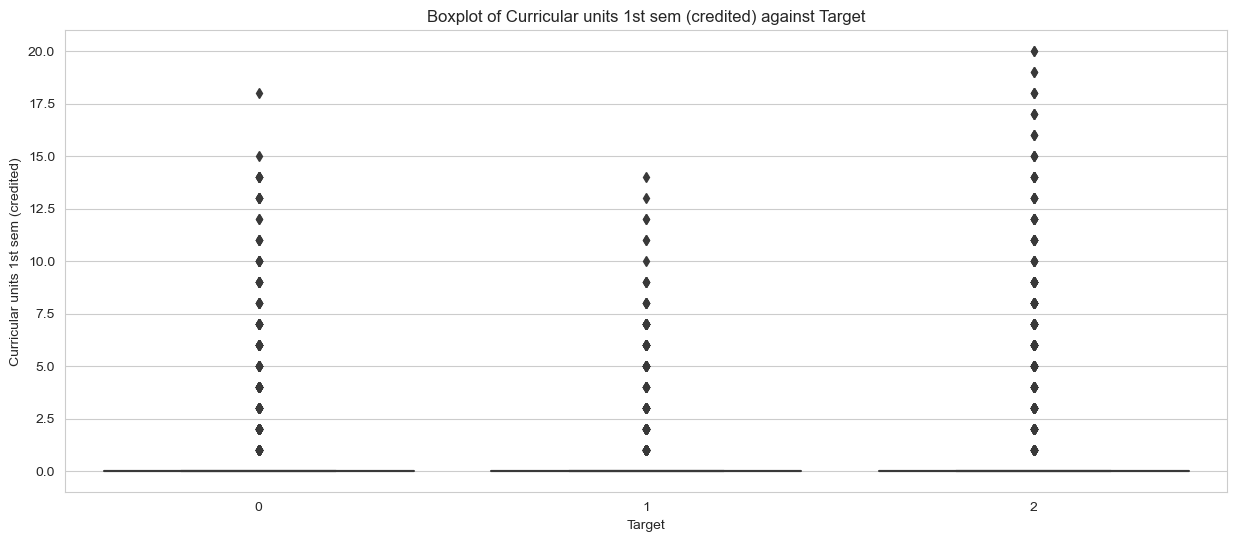

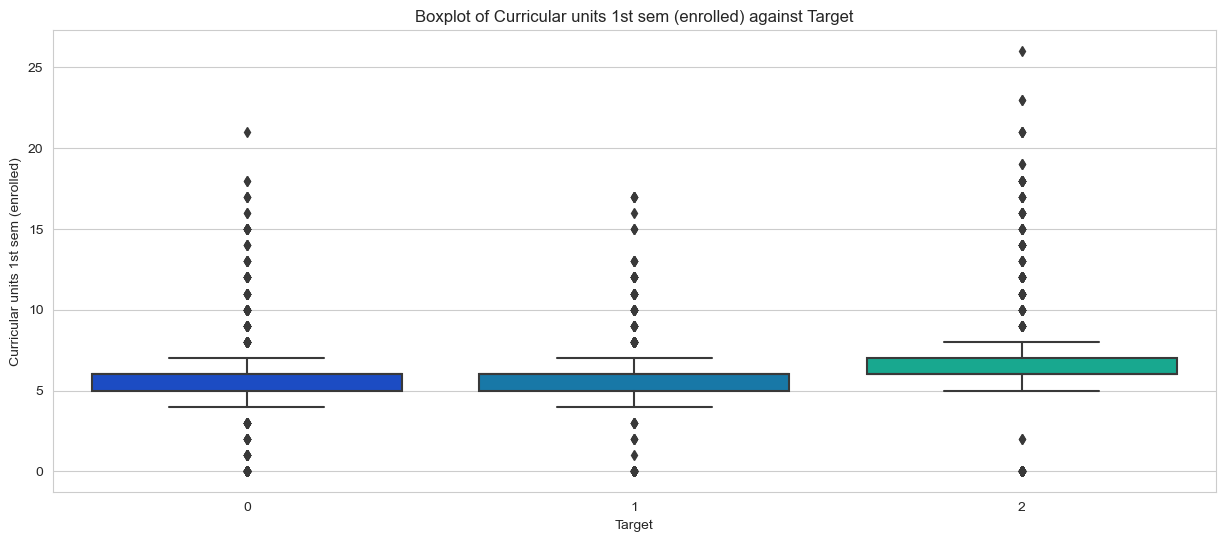

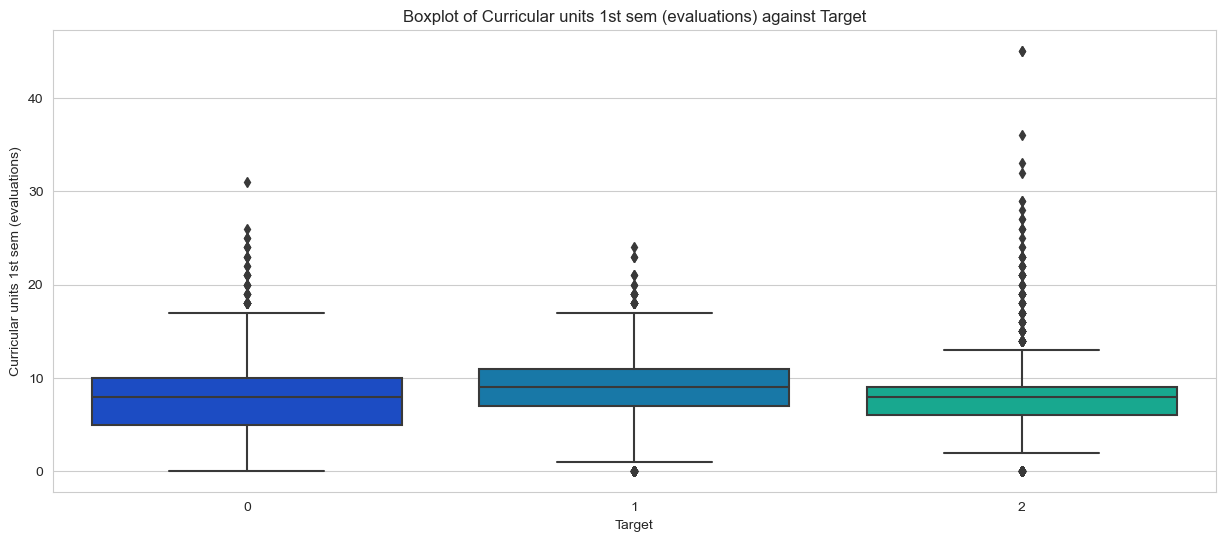

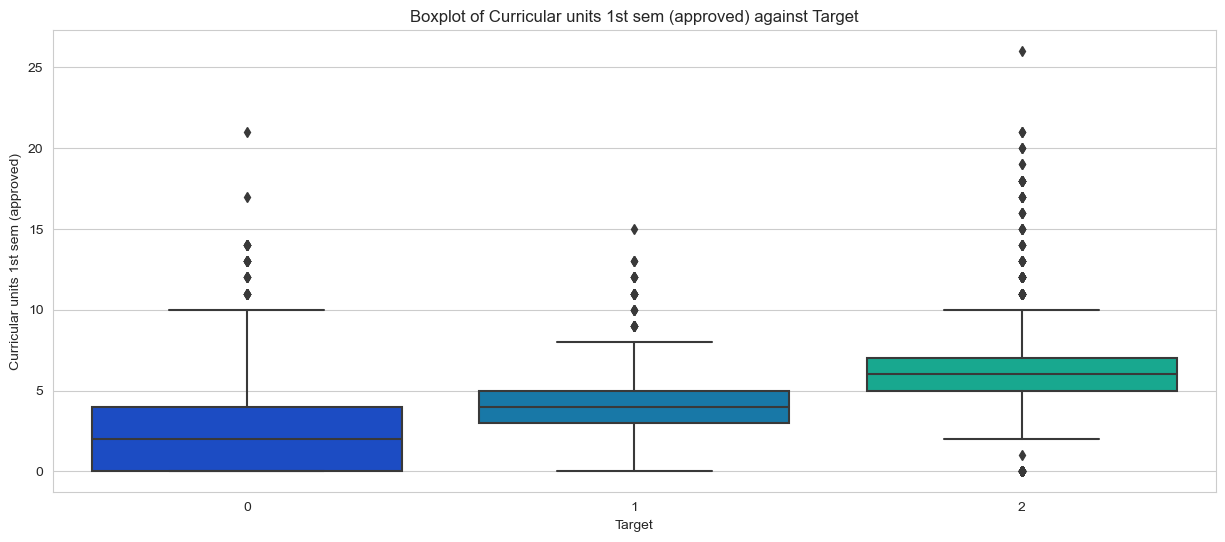

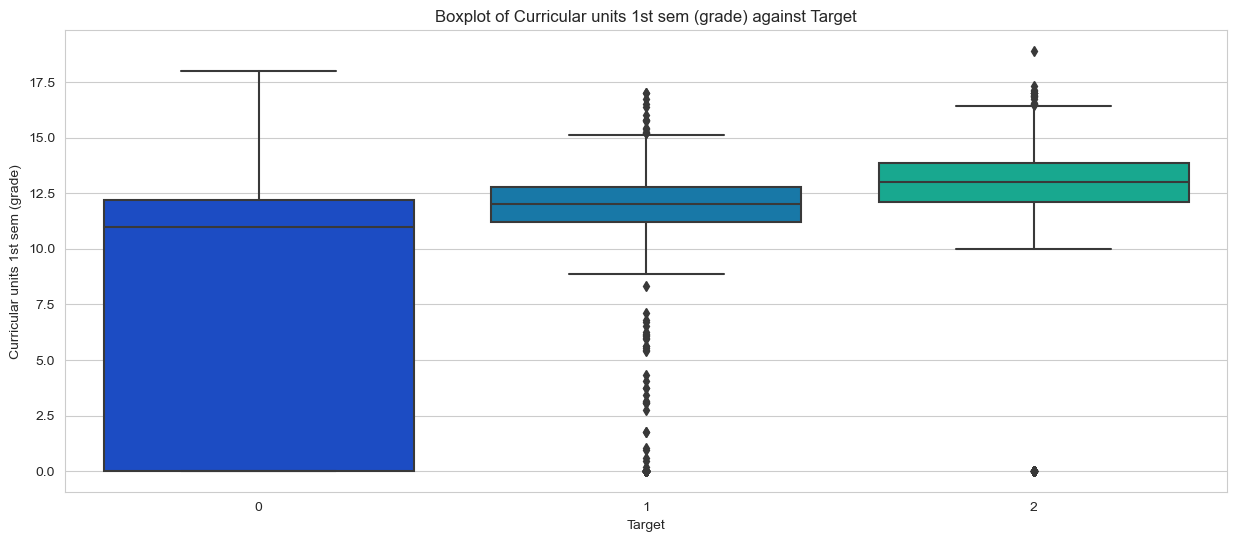

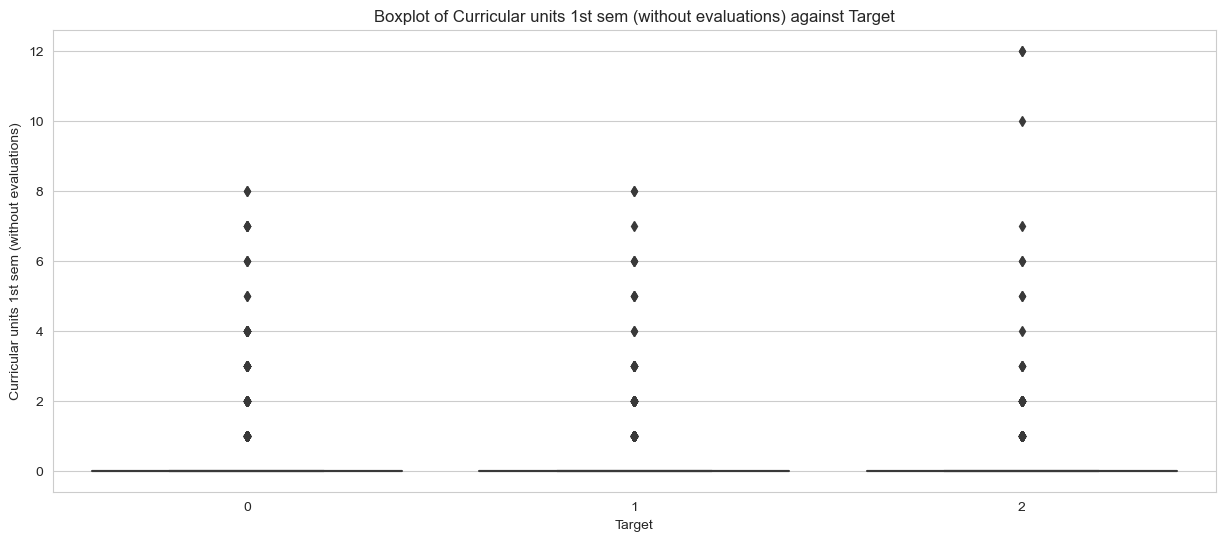

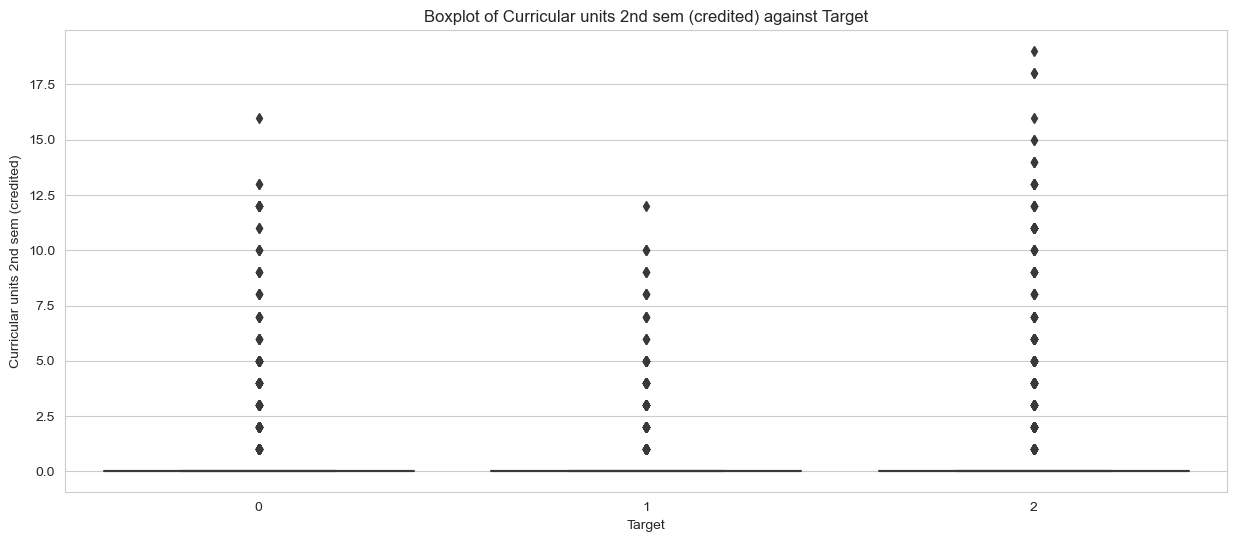

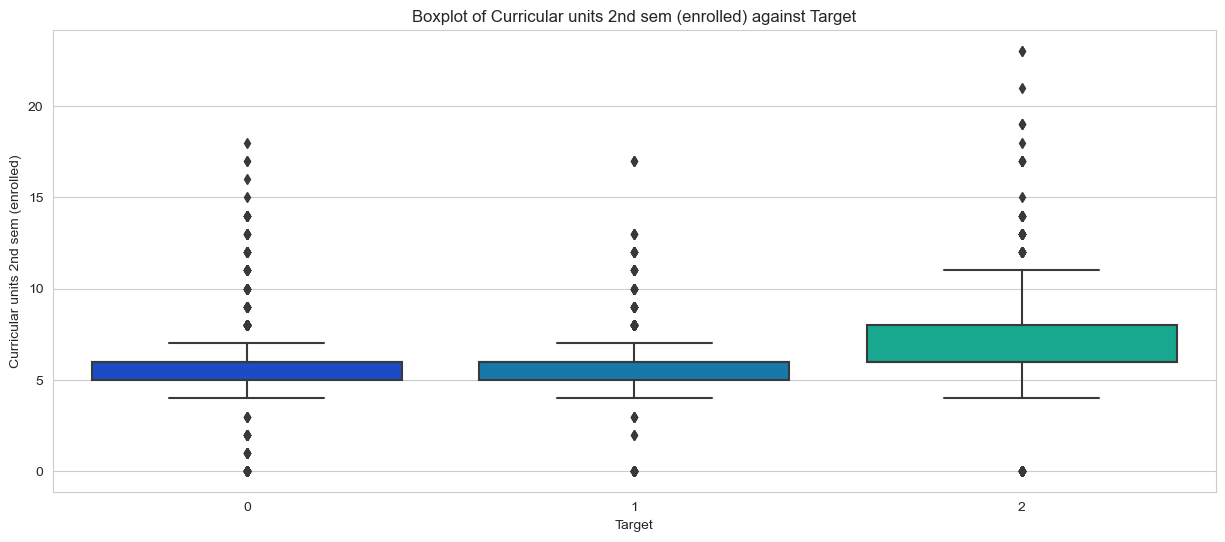

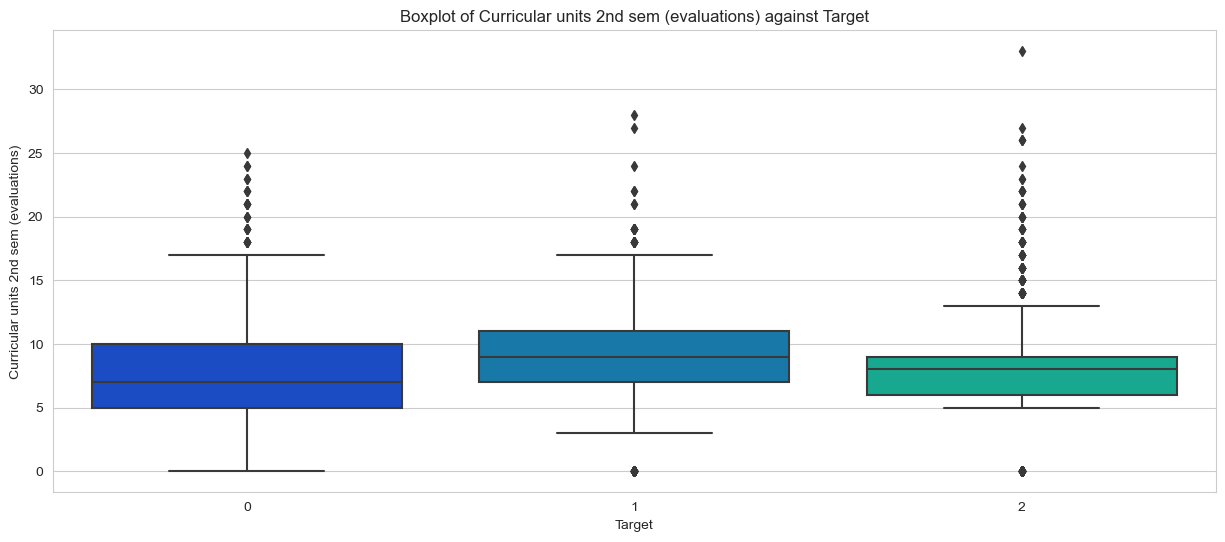

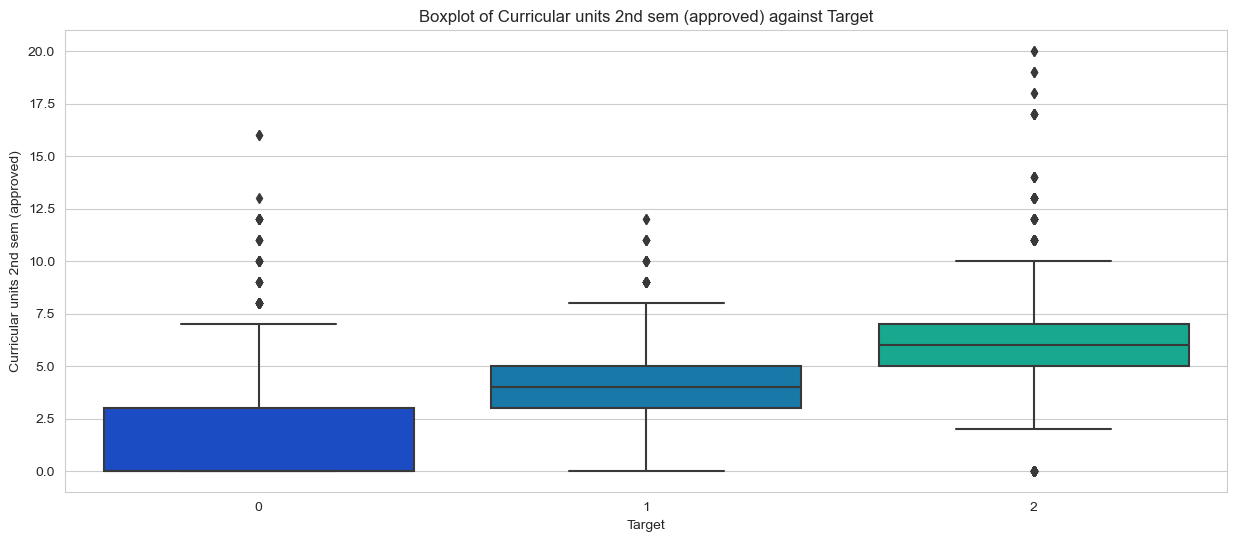

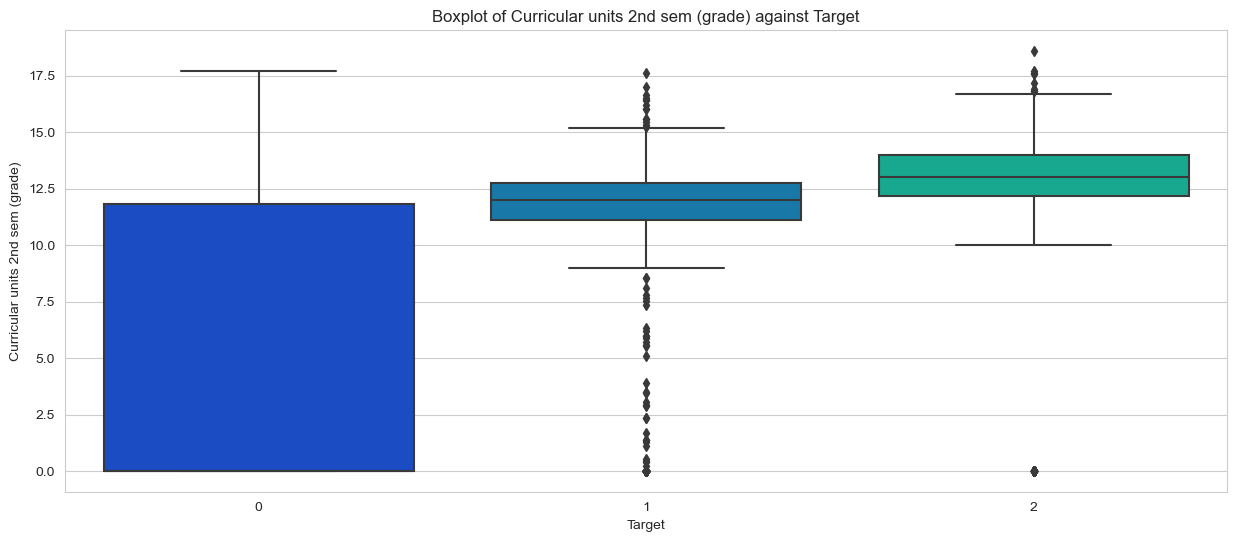

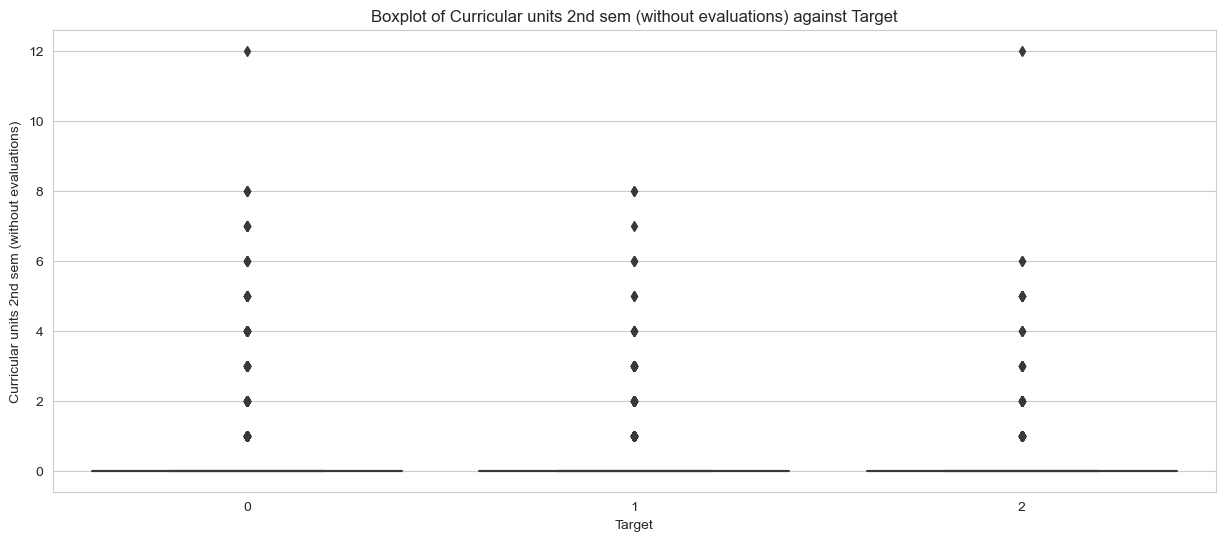

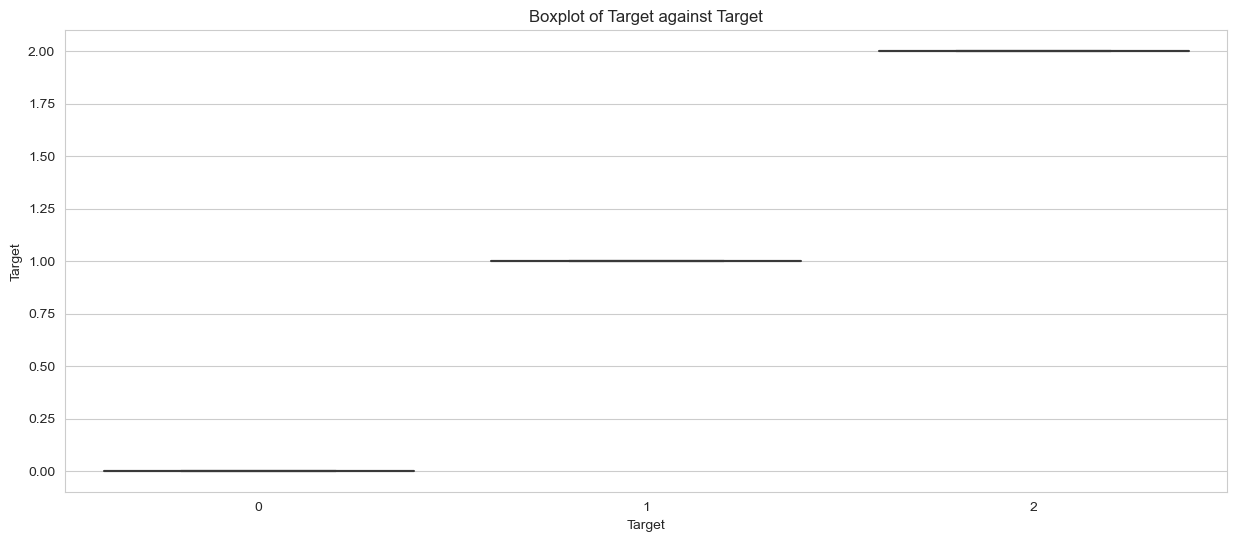

In [74]:
for column in balanced_df:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Target', y=column , data=balanced_df, palette='winter')
    plt.title(f'Boxplot of {column} against Target')
    plt.show()

In [75]:
from scipy import stats
z_scores = np.abs(stats.zscore(balanced_df))

threshold = 2

outliers = (z_scores > threshold).any(axis=1)

df = df[~outliers]
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_16248\3544167210.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers]


,Marital status,Application mode,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
3,1,17,1,122.0,119.6,1,0,0,1,0,...,6,13.428571,0,0,6,10,5,12.400000,0,2
10,1,1,1,139.0,130.6,1,0,0,1,0,...,6,12.333333,0,0,6,7,5,14.200000,0,2
15,1,1,1,127.0,120.7,1,0,0,1,0,...,5,13.200000,0,0,6,7,0,0.000000,0,0
16,1,18,1,137.0,137.4,1,0,0,1,0,...,1,12.000000,0,0,6,14,2,11.000000,0,1
17,1,17,1,135.0,127.3,1,0,0,1,0,...,7,13.306250,0,0,8,8,8,14.545000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,2,39,1,133.1,140.0,0,0,1,1,1,...,4,10.750000,0,0,5,12,3,13.333333,0,0
4405,1,1,1,160.0,133.0,1,0,0,1,1,...,7,14.314286,0,0,8,8,7,14.314286,0,2
4406,1,1,1,145.0,127.5,1,0,0,1,1,...,4,12.000000,0,0,6,8,2,11.333333,0,1
4413,1,43,1,143.0,121.2,1,0,0,1,1,...,5,11.600000,0,2,8,10,2,13.000000,0,1


In [76]:
df.shape

(1444, 26)

### Splitting the dataset

In [77]:
x = df.drop(['Target'], axis=1)
y = df.Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

print('Train size:', len(x_train))
print('Test size:', len(x_test))

Train size: 1155
Test size: 289


In [78]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train) 

dt_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(dt_pred, y_test)
print('Decision Tree Accuracy:', dt_accuracy)

Decision Tree Accuracy: 0.6505190311418685


In [79]:
mse = mean_squared_error(y_test, dt_pred)
mae = mean_absolute_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)

# Print the results
print(f"Test Set Mean Square Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")

Test Set Mean Square Error: 0.5882352941176471, Mean Absolute Error: 0.4290657439446367, R²: 0.19585570250098205


### Split the data in train, validation, and test

In [80]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
dt.fit(x_train, y_train)

# Predict on Validation and Test sets
y_val_pred = dt.predict(x_val)
y_test_pred = dt.predict(x_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Set MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

Validation Set MSE: 0.671280276816609, MAE: 0.4844290657439446, R²: 0.09272444818434844
Test Set MSE: 0.7889273356401384, MAE: 0.532871972318339, R²: -0.07849941076338873


### Cross Validation

In [81]:
cv_mse = cross_val_score(dt, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(dt, x, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(dt, x, y, cv=5, scoring='r2')

print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")

Cross-Validation MSE: 0.6870122068435217, MAE: 0.47508650519031137, R²: 0.06484314578919255


### Confusion Matrix

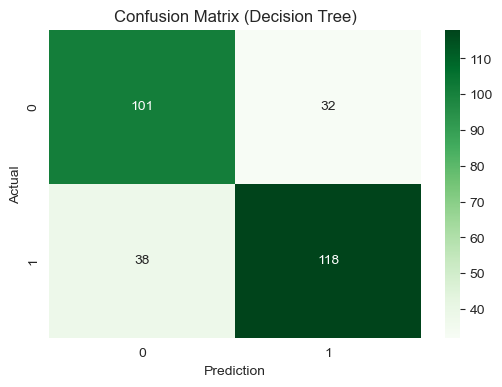

In [82]:
y_pred_binary = (dt_pred > dt_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

### Roc & Auc

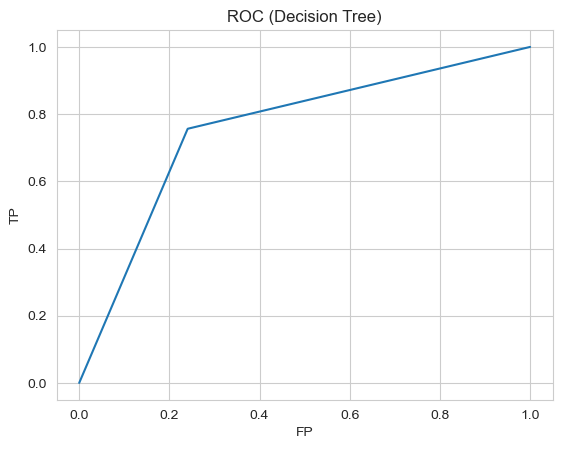

In [83]:
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC (Decision Tree)')
plt.show()

### Random Forest

In [84]:
rf = RandomForestClassifier(n_estimators=200)  
rf.fit(x_train, y_train) 

rf_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(rf_pred, y_test)
print('Random Forest Accuracy:', rf_accuracy)

Random Forest Accuracy: 0.7577854671280276


### Calculate MSE, MAE, and R2 for test

In [85]:
mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

# Print the results
print(f"Test Set Mean Square Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")

Test Set Mean Square Error: 0.4290657439446367, Mean Absolute Error: 0.3044982698961938, R²: 0.41344768888306926


### Split the data in train, validation, and test

In [86]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
rf.fit(x_train, y_train)

# Predict on Validation and Test sets
y_val_pred = rf.predict(x_val)
y_test_pred = rf.predict(x_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set Mean Square Error: {val_mse}, Mean Absolute Error: {val_mae}, R²: {val_r2}")
print(f"Test Set Mean Square Error: {test_mse}, Mean Absolute Error: {test_mae}, R²: {test_r2}")

Validation Set Mean Square Error: 0.35986159169550175, Mean Absolute Error: 0.2837370242214533, R²: 0.5136254773771765
Test Set Mean Square Error: 0.4844290657439446, Mean Absolute Error: 0.3391003460207612, R²: 0.33776351970669116


### Cross Validation

In [87]:
cv_mse = cross_val_score(rf, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(rf, x, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(rf, x, y, cv=5, scoring='r2')

print(f"Cross-Validation Mean Square Error: {-np.mean(cv_mse)}, Mean Absolute Error: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")

Cross-Validation Mean Square Error: 0.44316128412149175, Mean Absolute Error: 0.3206098615916955, R²: 0.38953119202017367


### Confusion Matrix

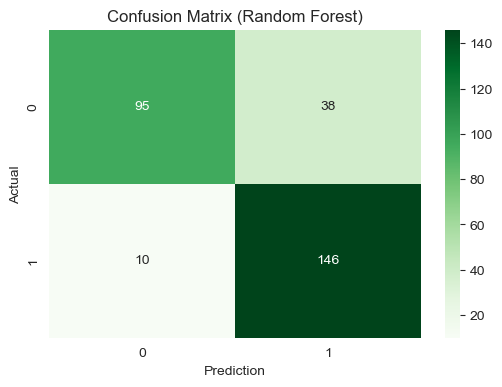

In [88]:
y_pred_binary = (rf_pred > rf_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

### Roc & Auc

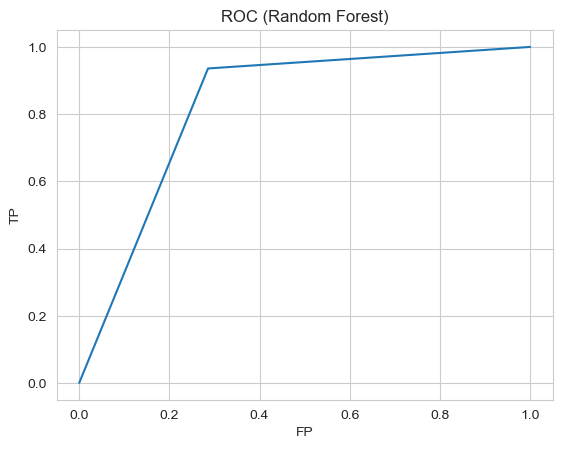

In [89]:
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC (Random Forest)')
plt.show()

### SVM

In [90]:
svc = SVC(kernel='linear')  
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

svc_accuracy = accuracy_score(svc_pred, y_test)
print('SVC Accuracy:', svc_accuracy)

SVC Accuracy: 0.726643598615917


### Calculate MSE, MAE, and R2 for test

In [91]:
mse = mean_squared_error(y_test, svc_pred)
mae = mean_absolute_error(y_test, svc_pred)
r2 = r2_score(y_test, svc_pred)

# Print the results
print(f"Test Set Mean Square Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")

Test Set Mean Square Error: 0.4809688581314879, Mean Absolute Error: 0.34256055363321797, R²: 0.3424937802802148


### Split the data in train, validation, and test

In [92]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
svc.fit(x_train, y_train)

# Predict on Validation and Test sets
y_val_pred = svc.predict(x_val)
y_test_pred = svc.predict(x_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set Mean Square Error: {val_mse}, Mean Absolute Error: {val_mae}, R²: {val_r2}")
print(f"Test Set Mean Square Error: {test_mse}, Mean Absolute Error: {test_mae}, R²: {test_r2}")

Validation Set Mean Square Error: 0.3460207612456747, Mean Absolute Error: 0.2906574394463668, R²: 0.5323321897857466
Test Set Mean Square Error: 0.4809688581314879, Mean Absolute Error: 0.34256055363321797, R²: 0.3424937802802148


### Cross Validation

In [93]:
cv_mse = cross_val_score(svc, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(svc, x, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(svc, x, y, cv=5, scoring='r2')

print(f"Cross-Validation Mean Square Error: {-np.mean(cv_mse)}, Mean Absolute Error: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")

Cross-Validation Mean Square Error: 0.46122885428681276, Mean Absolute Error: 0.3379445405613226, R²: 0.3544921273302678


### Confusion Matrix

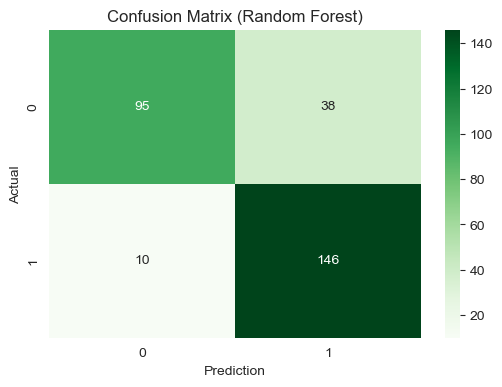

In [94]:
y_pred_binary = (rf_pred > svc_pred.mean()).astype(int)
y_test_binary = (y_test > svc_pred.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

### Roc & Auc

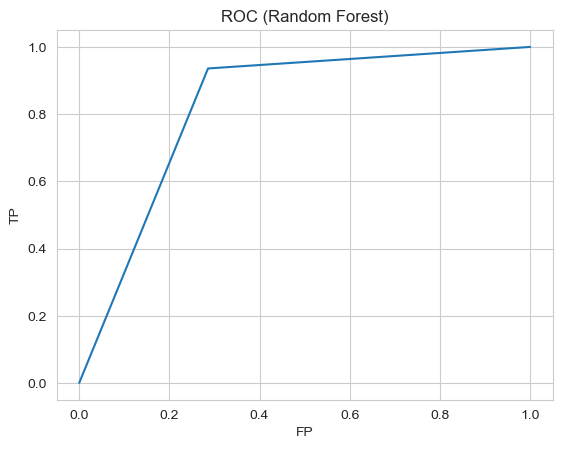

In [95]:
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC (Random Forest)')
plt.show()

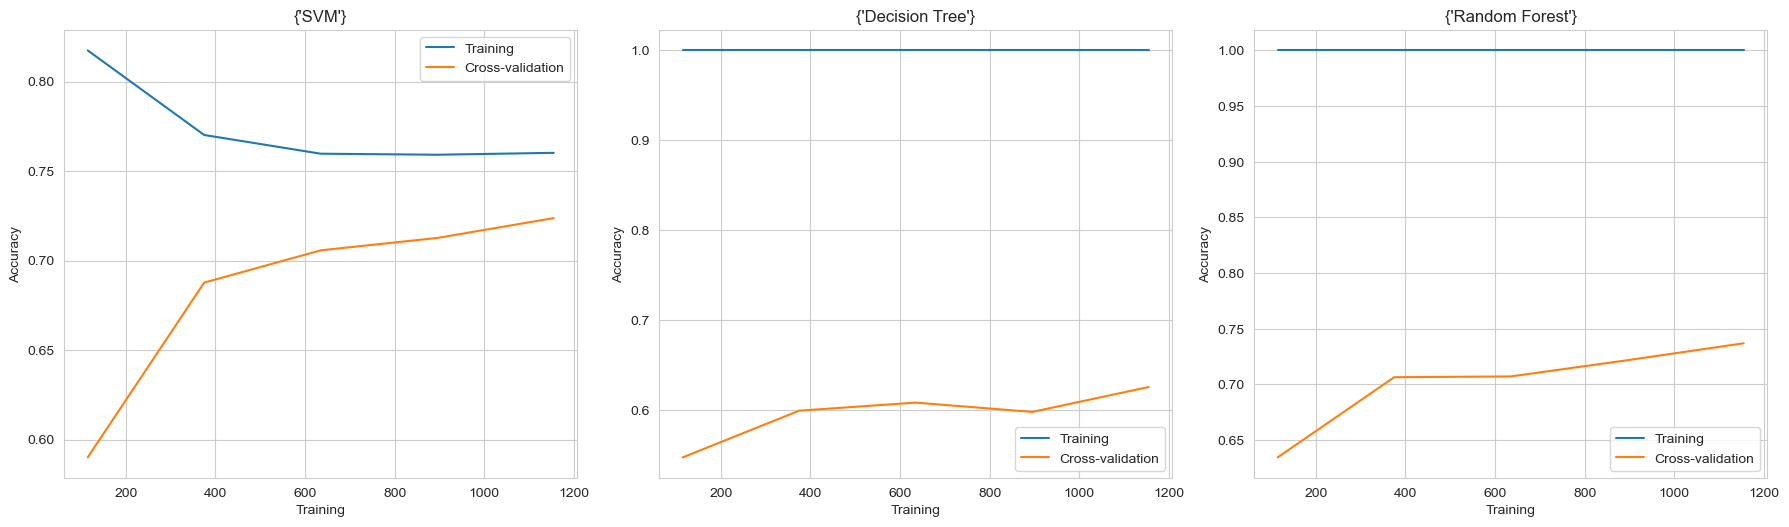

In [96]:
my_model = [svc, dt, rf]
models = ['SVM', 'Decision Tree', 'Random Forest']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, model in enumerate(my_model):
    train_sizes, train_scores, test_scores = learning_curve(model, x, y, n_jobs=-1)
    
    axes[i].plot(train_sizes, train_scores.mean(axis=1), label='Training')
    axes[i].plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation')
    axes[i].set_xlabel('Training')
    axes[i].set_ylabel('Accuracy')
    axes[i].set_title({models[i]})
    axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()